# Decision Trees and Random Forests in Python - Updated

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## EDA

We'll just check out a simple pairplot for this small dataset.

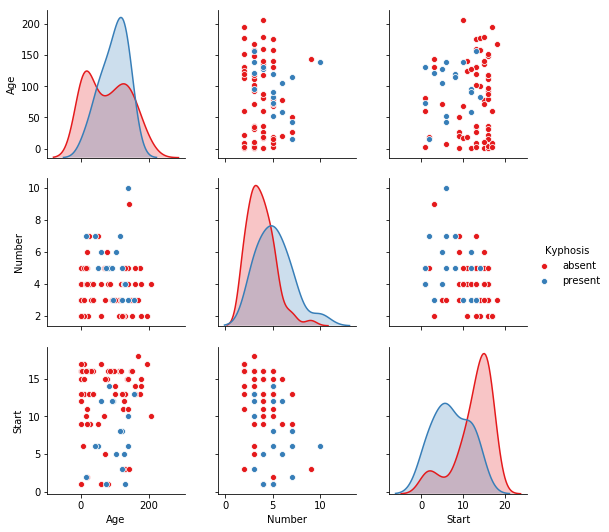

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## Train Test Split

Let's split up the data into a training set and a test set!

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees

We'll start just by training a single decision tree.

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.89      0.73      0.80        22
     present       0.14      0.33      0.20         3

   micro avg       0.68      0.68      0.68        25
   macro avg       0.52      0.53      0.50        25
weighted avg       0.80      0.68      0.73        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[16  6]
 [ 2  1]]


## Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [15]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

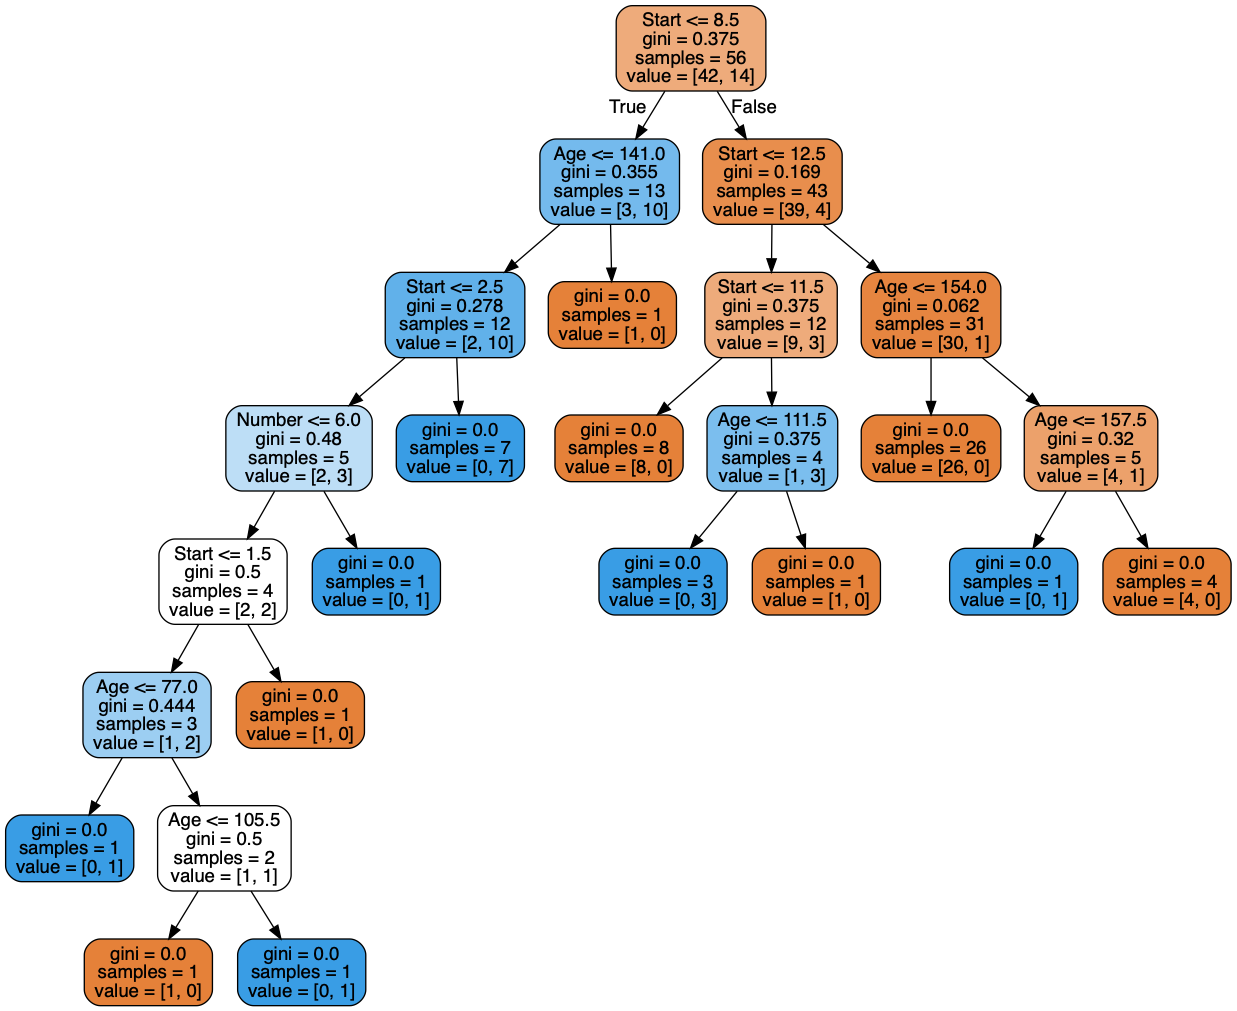

In [17]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

## Motivating Random Forests: Decision Trees

Random forests are an example of an *ensemble learner* built on decision trees.
For this reason we'll start by discussing decision trees themselves.

Decision trees are extremely intuitive ways to classify or label objects: you simply ask a series of questions designed to zero-in on the classification.

The binary splitting makes this extremely efficient: in a well-constructed tree, each question will cut the number of options by approximately half, very quickly narrowing the options even among a large number of classes.
The trick, of course, comes in deciding which questions to ask at each step.
In machine learning implementations of decision trees, the questions generally take the form of axis-aligned splits in the data: that is, each node in the tree splits the data into two groups using a cutoff value within one of the features.
Let's now look at an example of this.

### Creating a decision tree

Consider the following two-dimensional data, which has one of four class labels:

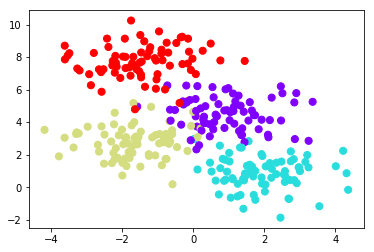

In [22]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.

This process of fitting a decision tree to our data can be done in Scikit-Learn with the DecisionTreeClassifier estimator:

/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


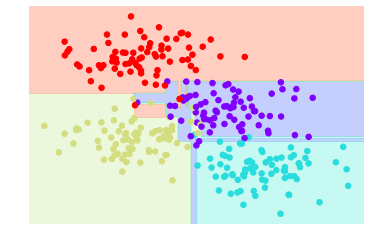

In [24]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

#Let's write a quick utility function to help us visualize the output of the classifier:

def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    
visualize_classifier(DecisionTreeClassifier(), X, y)
#Now we can examine what the decision tree classification looks like:

## Random Forests

Now let's compare the decision tree model to a random forest.

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))

[[20  2]
 [ 2  1]]


In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.91      0.91      0.91        22
     present       0.33      0.33      0.33         3

   micro avg       0.84      0.84      0.84        25
   macro avg       0.62      0.62      0.62        25
weighted avg       0.84      0.84      0.84        25



# That's it on Practical!!! 